In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from stop_words import get_stop_words

In [2]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv' , sep='\t')

In [3]:
train.head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,1436222,Tarte rainforest after dark colored clay,1,Beauty/Makeup/Makeup Palettes,Tarte,36.0,1,"A brand-new, unused, unopened, undamaged item...."
1,402989,Mac mineralize skin finish,3,Beauty/Makeup/Face,MAC,15.0,1,"Color is gold deposit, about 85% of product left"
2,638275,White Case iPhone 6/6s,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,3.0,1,New Ultra thin Candy TPU Silicone Rubber Soft
3,1113629,Victoria's Secret push-up plunge,3,Women/Underwear/Bras,Victoria's Secret,18.0,1,VS sexy little thing multi way bras both size ...
4,328823,Disney Princess Toddler Boots Size 10,2,Kids/Girls 2T-5T/Shoes,Disney,13.0,1,New with out box!
5,220325,Nwt Mens Black Quicksilver Shorts,1,Men/Shorts/Casual Shorts,Quiksilver,15.0,0,New with tags Size 38 Lighting in pictures mak...
6,208586,Jeans,2,"Men/Jeans/Classic, Straight Leg",Old Navy,10.0,0,Old Navy straight leg cut
7,683830,Yeezy,1,Men/Shoes/Fashion Sneakers,NaN,3.0,1,Yeezy shoe keychain. Get it while it lasts. Su...
8,432035,OS lularoe brand new with Tags,1,Women/Jeans/Leggings,LuLaRoe,24.0,0,No description yet
9,101679,Air Griffey Max 1,3,Men/Shoes/Athletic,Nike,90.0,1,Used .. only worn once ... just like new ! 100...


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037774 entries, 0 to 1037773
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1037774 non-null  int64  
 1   name               1037774 non-null  object 
 2   item_condition_id  1037774 non-null  int64  
 3   category_name      1033392 non-null  object 
 4   brand_name         594827 non-null   object 
 5   price              1037774 non-null  float64
 6   shipping           1037774 non-null  int64  
 7   item_description   1037772 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 63.3+ MB


In [5]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.037774e+06,1.037774e+06,1.037774e+06,1.037774e+06
mean,7.411749e+05,1.907535e+00,2.673494e+01,4.470511e-01
std,4.280261e+05,9.032218e-01,3.862050e+01,4.971887e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.707685e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.410010e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111633e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.004000e+03,1.000000e+00


In [6]:
print(train.columns)

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')


In [7]:
print(test.columns)

Index(['id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')


In [8]:
train.isnull().sum() # we will deal with these null values in data cleaning phase

train_id                  0
name                      0
item_condition_id         0
category_name          4382
brand_name           442947
price                     0
shipping                  0
item_description          2
dtype: int64

# Univariate analysis of category_name

In [9]:
cat_count = train['category_name'].value_counts()

In [10]:
cat_count

Women/Athletic Apparel/Pants, Tights, Leggings    42050
Women/Tops & Blouses/T-Shirts                     32478
Beauty/Makeup/Face                                23925
Beauty/Makeup/Lips                                21003
Electronics/Video Games & Consoles/Games          18510
                                                  ...  
Handmade/Dolls and Miniatures/Scale Models            1
Handmade/Quilts/Patchwork                             1
Handmade/Dolls and Miniatures/Fantasy                 1
Handmade/Bags and Purses/Wallet                       1
Handmade/Furniture/Other                              1
Name: category_name, Length: 1258, dtype: int64

In [11]:
cat_count_test = test['category_name'].value_counts()

In [12]:
cat_count_test

Women/Athletic Apparel/Pants, Tights, Leggings    18127
Women/Tops & Blouses/T-Shirts                     13902
Beauty/Makeup/Face                                10410
Beauty/Makeup/Lips                                 8907
Electronics/Video Games & Consoles/Games           8047
                                                  ...  
Home/Seasonal Décor/New Year's                        1
Handmade/Dolls and Miniatures/Primitive               1
Handmade/Quilts/Patchwork                             1
Handmade/Housewares/Other                             1
Handmade/Children/Toddler                             1
Name: category_name, Length: 1167, dtype: int64

### Here we will split category into three categories of main category and 2 sub categories. This will make it easier to predict prices depending upon different categories and sub categories 

In [13]:
def split_categories(category):
    try:
        main_cat1,sub_cat1,sub_cat2 = category.split("/")
        return main_cat1,sub_cat1,sub_cat2
    except:
        return 'No Category','No Category','No Category'

In [14]:
train['main_cat'],train['sub_cat1'],train['sub_cat2'] = zip(*train['category_name'].apply(lambda x: split_categories(x)))

In [15]:
test['main_cat'],test['sub_cat1'],test['sub_cat2'] = zip(*test['category_name'].apply(lambda x: split_categories(x)))

In [16]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,sub_cat1,sub_cat2
0,1436222,Tarte rainforest after dark colored clay,1,Beauty/Makeup/Makeup Palettes,Tarte,36.0,1,"A brand-new, unused, unopened, undamaged item....",Beauty,Makeup,Makeup Palettes
1,402989,Mac mineralize skin finish,3,Beauty/Makeup/Face,MAC,15.0,1,"Color is gold deposit, about 85% of product left",Beauty,Makeup,Face
2,638275,White Case iPhone 6/6s,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,3.0,1,New Ultra thin Candy TPU Silicone Rubber Soft,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins"
3,1113629,Victoria's Secret push-up plunge,3,Women/Underwear/Bras,Victoria's Secret,18.0,1,VS sexy little thing multi way bras both size ...,Women,Underwear,Bras
4,328823,Disney Princess Toddler Boots Size 10,2,Kids/Girls 2T-5T/Shoes,Disney,13.0,1,New with out box!,Kids,Girls 2T-5T,Shoes


In [17]:
main_cat=train['main_cat'].value_counts()

In [18]:
main_cat

Women                     464626
Beauty                    145804
Kids                      120273
Electronics                83638
Men                        65557
Home                       47406
Vintage & Collectibles     32608
Other                      31869
Handmade                   21540
Sports & Outdoors          16955
No Category                 7498
Name: main_cat, dtype: int64

<BarContainer object of 10 artists>

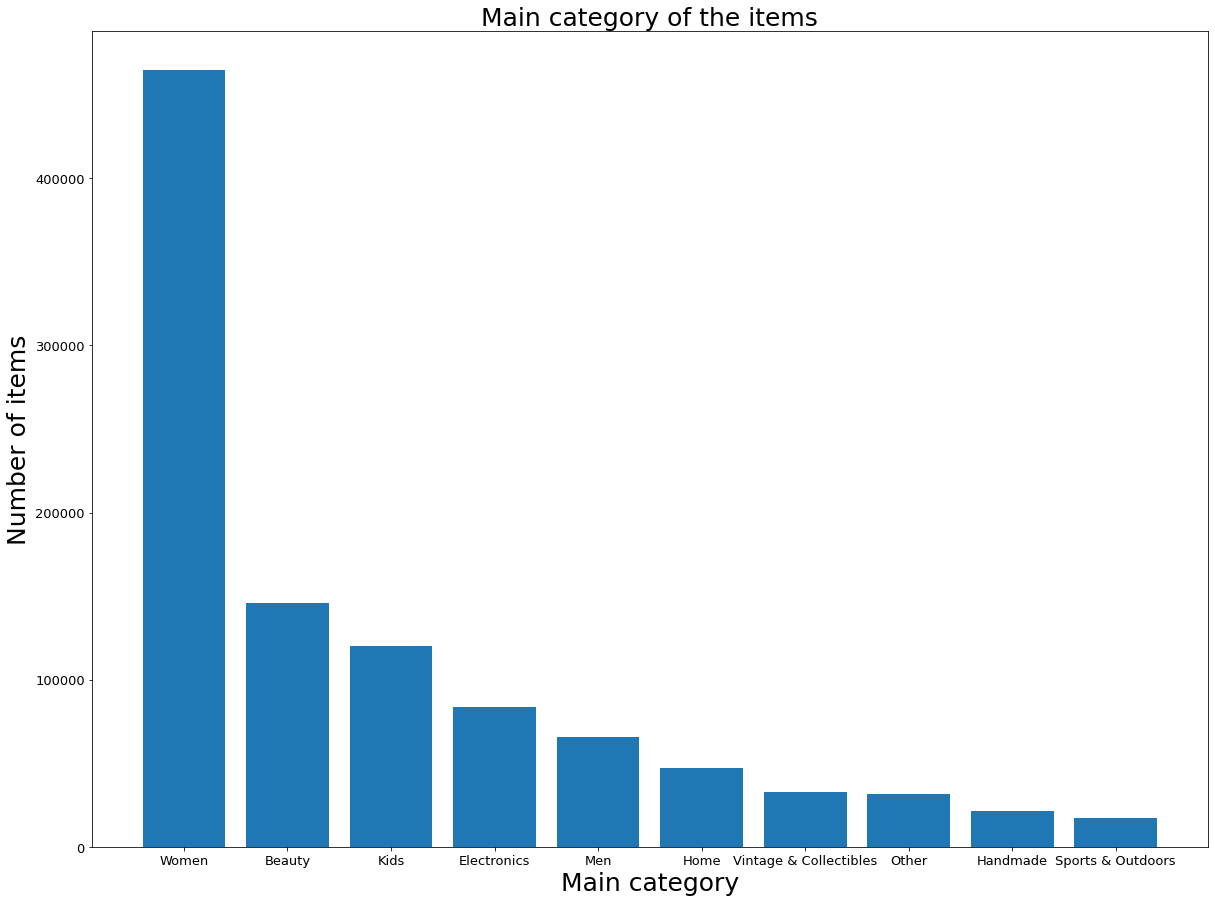

In [19]:
y=train['main_cat'].groupby(train['main_cat']).count().sort_values(ascending=False)[:10].values
x=train['main_cat'].groupby(train['main_cat']).count().sort_values(ascending=False)[:10].index
plt.figure(figsize=(20,15))
plt.title('Main category of the items',fontsize=25)
plt.xlabel('Main category',fontsize=25)
plt.ylabel('Number of items',fontsize=25)
plt.tick_params(labelsize=13)
plt.bar(x,y)
# top 10 main categories

In [20]:
sub_cat1=train['sub_cat1'].value_counts()

In [21]:
sub_cat1

Athletic Apparel        93980
Makeup                  87385
Tops & Blouses          75020
Shoes                   70482
Jewelry                 43039
                        ...  
Suits                      43
Ceramics and Pottery       41
Dolls and Miniatures       33
Books and Zines            31
Quilts                     23
Name: sub_cat1, Length: 114, dtype: int64

<BarContainer object of 10 artists>

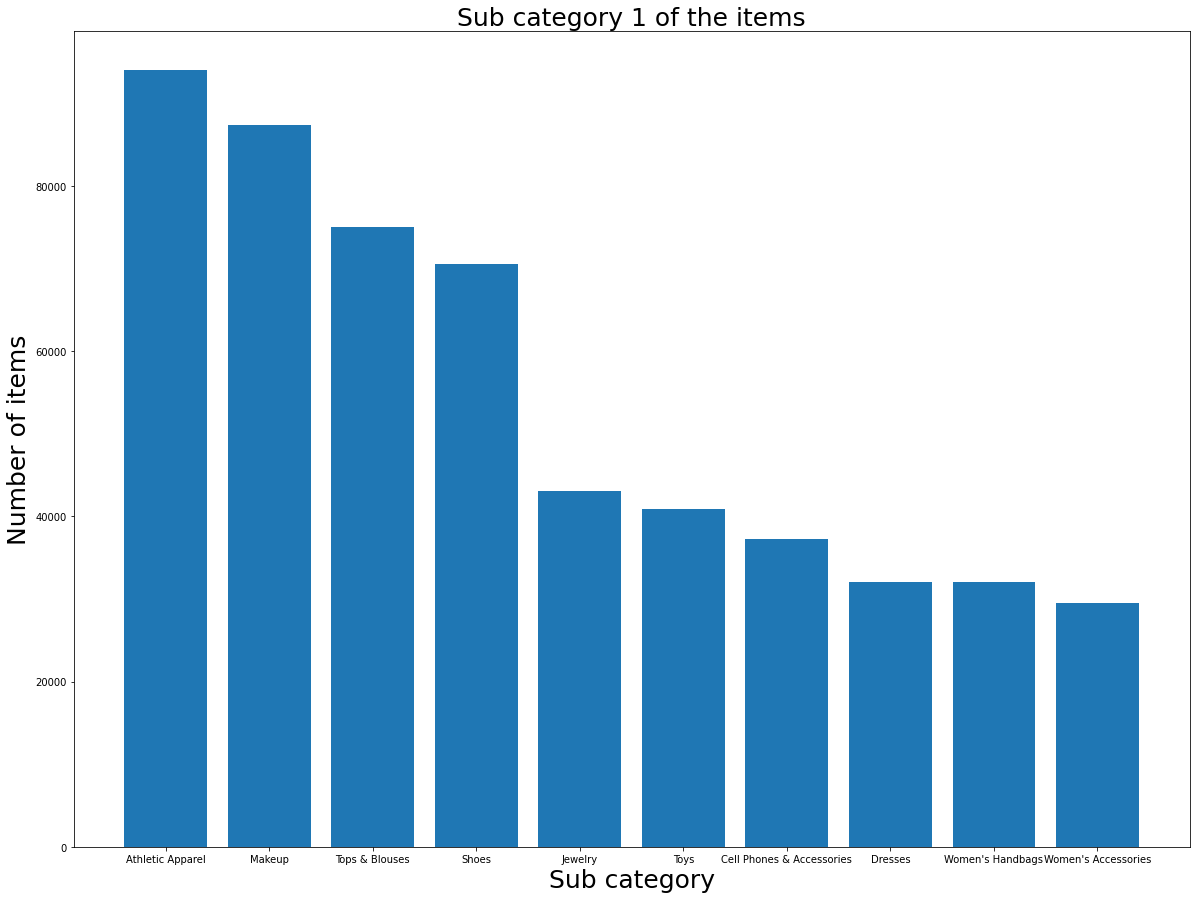

In [22]:
y=train['sub_cat1'].groupby(train['sub_cat1']).count().sort_values(ascending=False)[:10].values
x=train['sub_cat1'].groupby(train['sub_cat1']).count().sort_values(ascending=False)[:10].index
plt.figure(figsize=(20,15))
plt.title('Sub category 1 of the items',fontsize=25)
plt.xlabel('Sub category',fontsize=25)
plt.ylabel('Number of items',fontsize=25)
plt.tick_params(labelsize=10)
plt.bar(x,y)
#top 10 sub categories of items

In [23]:
sub_cat2=train['sub_cat2'].value_counts()

In [24]:
sub_cat2

Pants, Tights, Leggings       42050
Other                         35259
Face                          34953
T-Shirts                      32478
Shoes                         22516
                              ...  
International Publications        1
Bear                              1
Handkerchief                      1
Cleaning                          1
Storage                           1
Name: sub_cat2, Length: 851, dtype: int64

<BarContainer object of 10 artists>

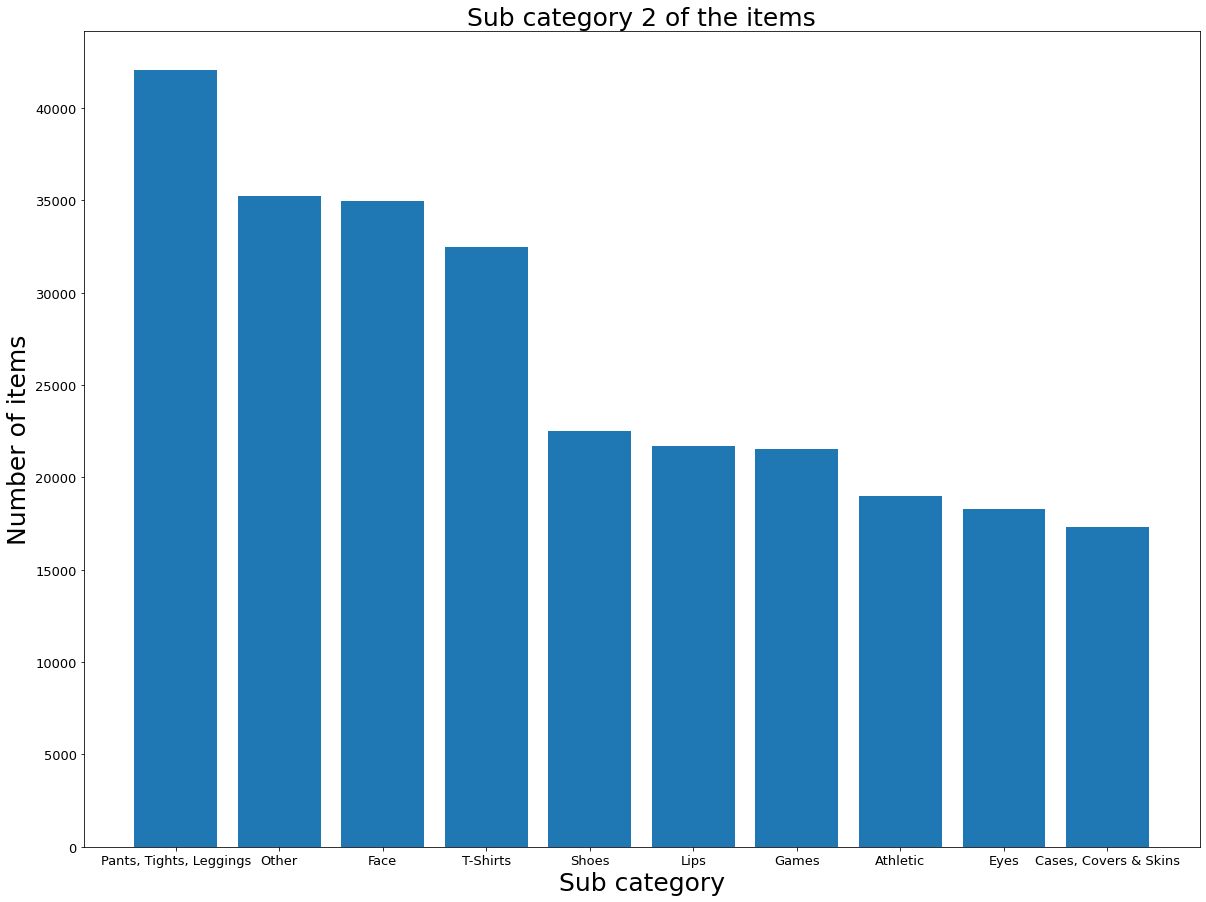

In [25]:
y=train['sub_cat2'].groupby(train['sub_cat2']).count().sort_values(ascending=False)[:10].values
x=train['sub_cat2'].groupby(train['sub_cat2']).count().sort_values(ascending=False)[:10].index
plt.figure(figsize=(20,15))
plt.title('Sub category 2 of the items',fontsize=25)
plt.xlabel('Sub category',fontsize=25)
plt.ylabel('Number of items',fontsize=25)
plt.tick_params(labelsize=13)
plt.bar(x,y)
#top 10 sub categories 2 of item

# Univariate analysis of price

Text(0.5, 1.0, 'Price Distribution - Training set')

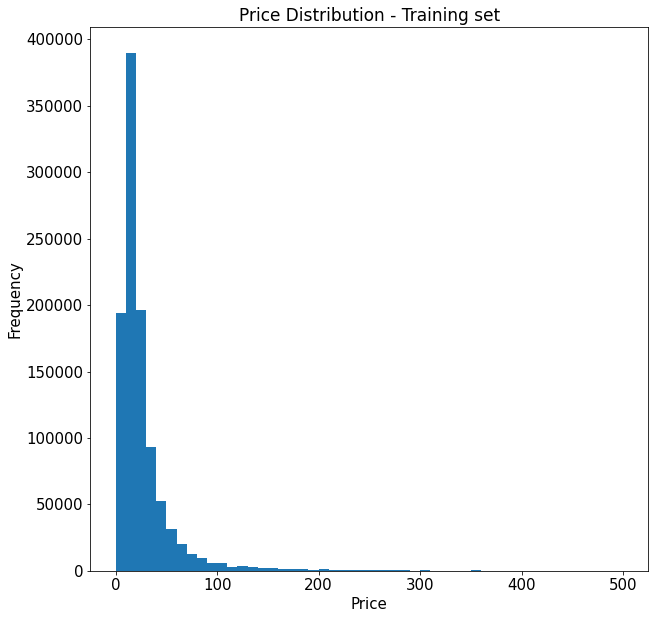

In [26]:
plt.figure(figsize=(10,10))
plt.hist(train['price'],bins=50,range=[0,500])
plt.xlabel('Price',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training set', fontsize=17)
# here we can say that price is skewed so we will apply log transformation to it and it is also easy to work with 
# target variable that is not skewed

In [27]:
train['log_price'] = np.log1p(train['price'])

Text(0.5, 1.0, 'Price Distribution - Training set')

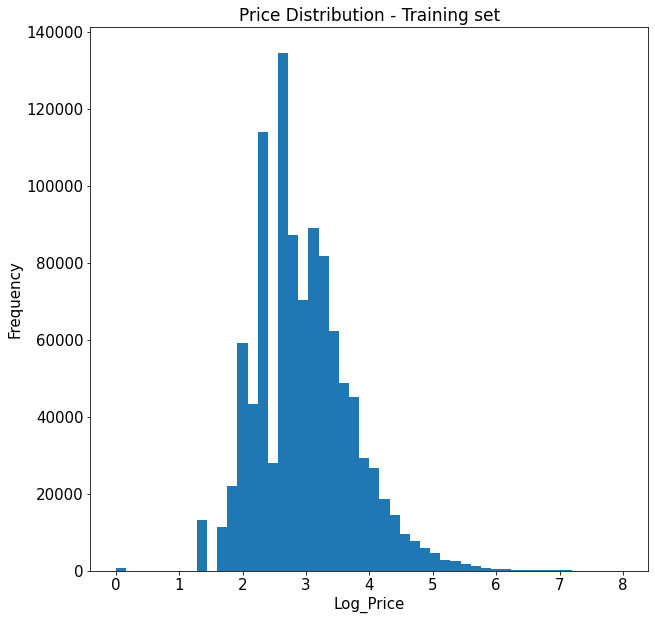

In [28]:
plt.figure(figsize=(10,10))
plt.hist(train['log_price'],bins=50,range=[0,8])
plt.xlabel('Log_Price',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training set', fontsize=17)

# Univariate analysis of brand_name

<BarContainer object of 10 artists>

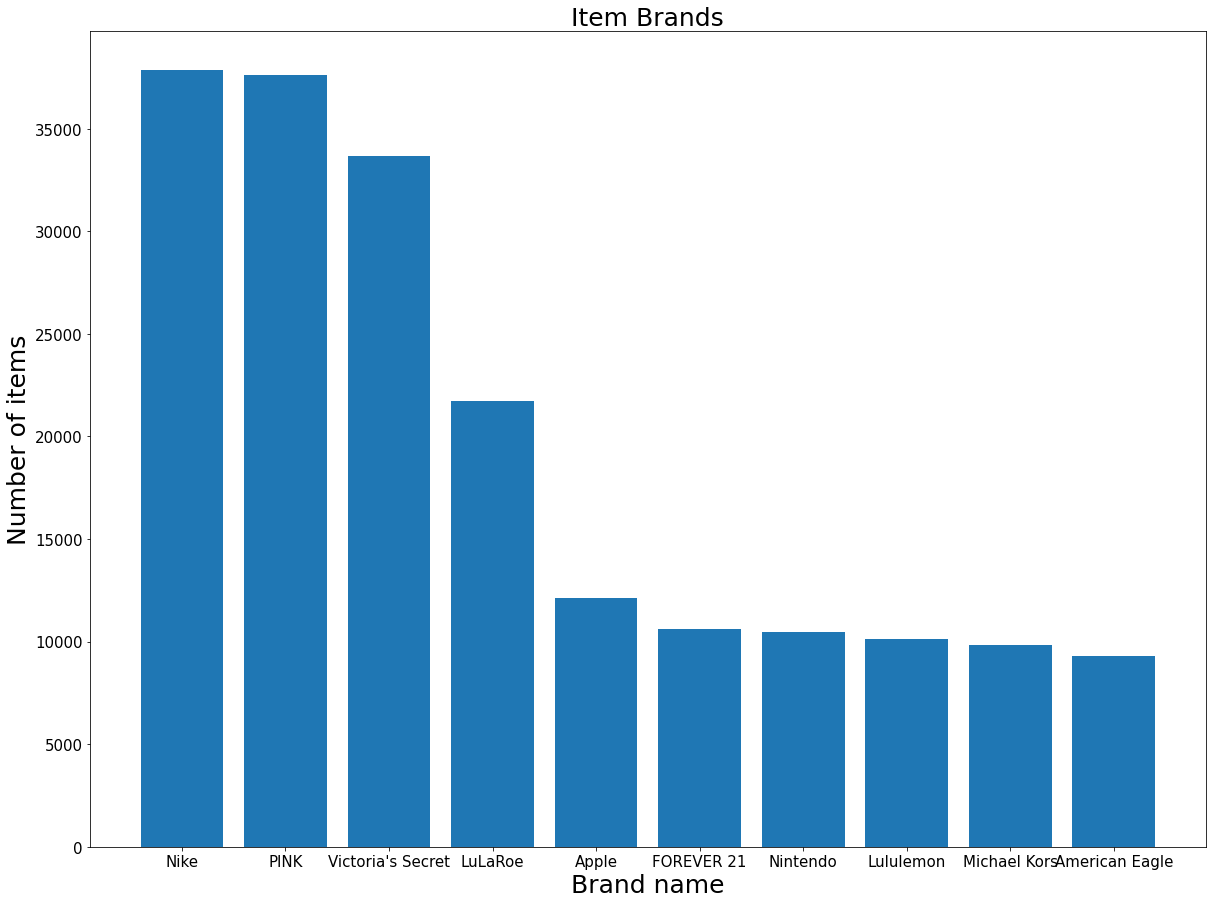

In [29]:
y=train['brand_name'].groupby(train['brand_name']).count().sort_values(ascending=False)[:10].values
x=train['brand_name'].groupby(train['brand_name']).count().sort_values(ascending=False)[:10].index
plt.figure(figsize=(20,15))
plt.title('Item Brands',fontsize=25)
plt.xlabel('Brand name',fontsize=25)
plt.ylabel('Number of items',fontsize=25)
plt.tick_params(labelsize=15)
plt.bar(x,y)

# Univariate analysis of item_condition

<BarContainer object of 5 artists>

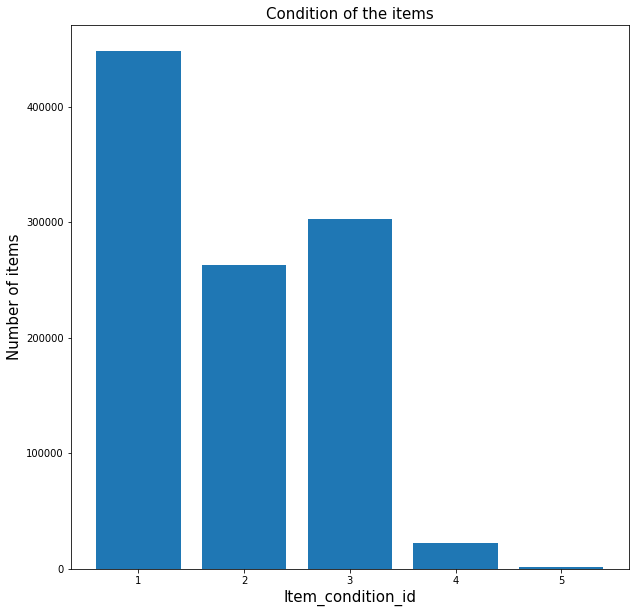

In [30]:
y=train['item_condition_id'].groupby(train['item_condition_id']).count().sort_values(ascending=False)[:10].values
x=train['item_condition_id'].groupby(train['item_condition_id']).count().sort_values(ascending=False)[:10].index
plt.figure(figsize=(10,10))
plt.title('Condition of the items',fontsize=15)
plt.xlabel('Item_condition_id',fontsize=15)
plt.ylabel('Number of items',fontsize=15)
plt.tick_params(labelsize=10)
plt.bar(x,y)

# Univariate analysis of item description

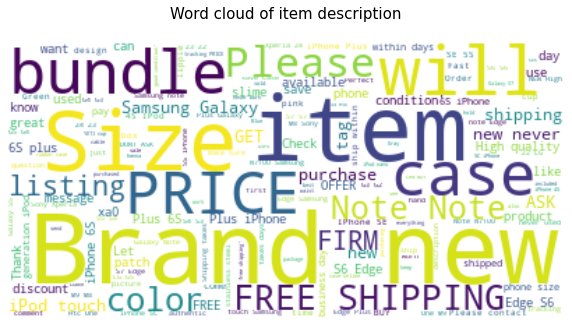

In [31]:
word_counter = Counter(train['item_description'])
most_common_words = word_counter.most_common(500)

stopwords = get_stop_words('en')
stopwords.extend(['rm'])  
#it is mentioned that information given to us is in a formatted way and it doesn't show text given in 
#dollar terms instead we get rm in it's place so it is added as aditional stop words since it occurences have 
#no effect on our prices

#here is the link to original mercari dataset where it is explained
#https://www.kaggle.com/c/mercari-price-suggestion-challenge/data

wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(str(most_common_words))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Word cloud of item description\n',fontsize=15)
plt.axis('off')
plt.show()

# Bivariate Analysis of log_price vs shipping

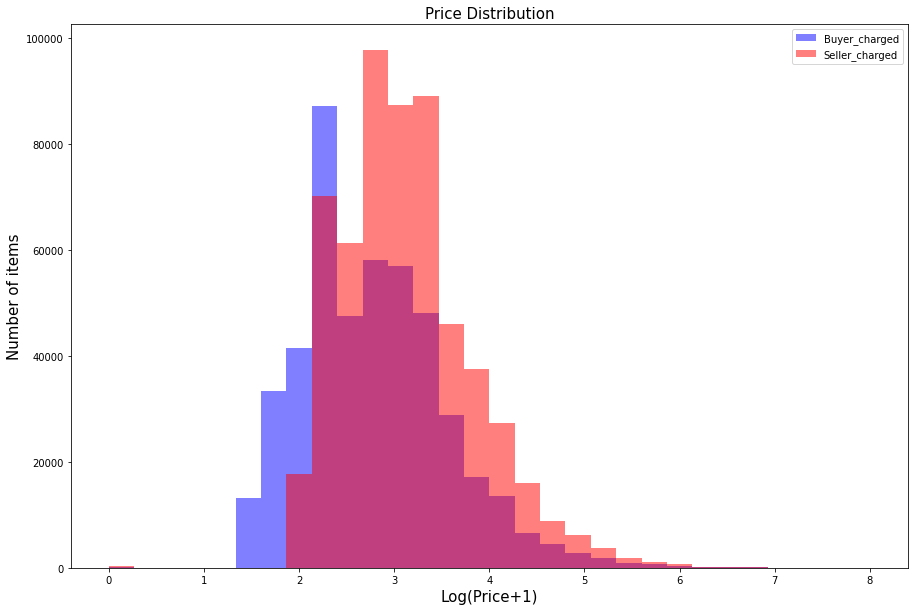

In [32]:
buyer_charged = train[train['shipping']==1]['log_price']
seller_charged = train[train['shipping']==0]['log_price']
fig,ax=plt.subplots(figsize=(15,10))
ax.hist(buyer_charged,bins=30,range=[0,8],label='Buyer_charged',color='b',alpha=0.5)
ax.hist(seller_charged,bins=30,range=[0,8],label='Seller_charged',color='r',alpha=0.5)
plt.title('Price Distribution',fontsize=15)
ax.set_xlabel('Log(Price+1)',fontsize=15)
ax.set_ylabel('Number of items',fontsize=15)
plt.legend(loc='upper right')
plt.show()

#### From the above histogram and below boxplot we can come to conclusion that higher the price of the item the more there is a chance that delivery will be free for the buyer and if we think logically then this also makes sense 

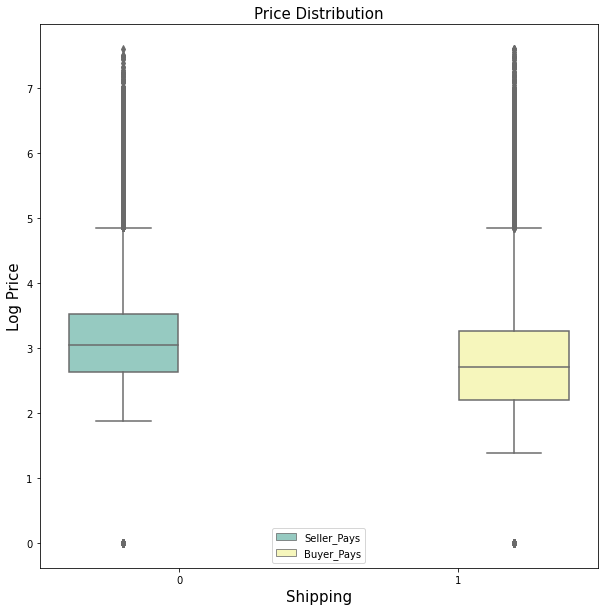

In [33]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(x=train['shipping'],y=train['log_price'],hue=train['shipping'],palette="Set3")
handles,labels=ax.get_legend_handles_labels()
ax.legend(handles,['Seller_Pays','Buyer_Pays'])
plt.title('Price Distribution',fontsize=15)
plt.xlabel('Shipping',fontsize=15)
plt.ylabel('Log Price',fontsize=15)
plt.tick_params(labelsize=10)
plt.show()

# Bivariate Analysis of price vs item description

In [34]:
train['description_wc']=[len(str(i).split()) for i in train['item_description']]

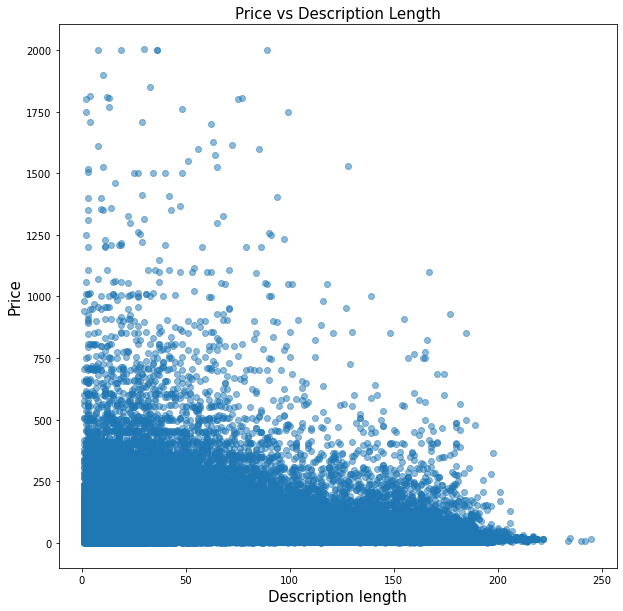

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(train['description_wc'],train['price'],alpha=0.5)
plt.title('Price vs Description Length',fontsize=15)
plt.xlabel('Description length',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Data Cleaning

#### Let's look if there are values in our train set for which prices are zero 

In [36]:
train[train['price']==0.0]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,sub_cat1,sub_cat2,log_price,description_wc
1856,598713,Colourpop Ultra Matte Monday Liquid Lip,2,Beauty/Makeup/Lips,ColourPop Cosmetics,0.0,1,Colourpop Cosmetics Ultra Matte Lipstick in Mo...,Beauty,Makeup,Lips,0.0,65
4721,576714,Nike Pro Tank top,2,Women/Athletic Apparel/Shirts & Tops,Nike,0.0,0,Nike pro workout tank. Worn 3 times max. Paid ...,Women,Athletic Apparel,Shirts & Tops,0.0,14
5291,739463,XL Maurice's,2,Women/Tops & Blouses/Blouse,Maurices,0.0,0,Shirt from Maurice's! Never worn size XL Alway...,Women,Tops & Blouses,Blouse,0.0,11
6021,416845,Nike Tshirt,1,Men/Tops/T-shirts,Nike,0.0,0,Short Sleeve Size - Large Retail [rm] Brand Ne...,Men,Tops,T-shirts,0.0,11
7335,934562,Kids Polo Boots Size 10,2,Kids/Boys 0-24 Mos/Shoes,NaN,0.0,0,Size 10 kids Dark blue Never worn,Kids,Boys 0-24 Mos,Shoes,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033017,838464,Nike Lunarcharge,3,Men/Shoes/Athletic,Nike,0.0,0,Retail [rm]. Cool grey/White. Used less than 5...,Men,Shoes,Athletic,0.0,15
1034186,1200488,TC LULAROE ORANGE ROSES,2,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,0.0,0,Beautiful leggings. But I have had them a few ...,Women,Athletic Apparel,"Pants, Tights, Leggings",0.0,26
1034527,762008,Tocca Liliana,3,Beauty/Fragrance/Women,NaN,0.0,0,Perfume 1.7 2/3 full,Beauty,Fragrance,Women,0.0,4
1035587,1092748,Baby Uggs,3,Kids/Girls 0-24 Mos/Shoes,UGG Australia,0.0,1,Small stitching is loose on one boot very. Can...,Kids,Girls 0-24 Mos,Shoes,0.0,15


#### Here we find that there are 604 values for which prices are zero and these 604 enteries are completely useless to us while predicting the prices so we delete them

In [37]:
train = train.drop(train[(train['price']==0.0)].index)

#### Above we found out that there were null values in our dataset so now we will deal with those values. for category_name we already handled the null values above when we were splitting categories now for brand name and item description we use 'fillna' to replace null values by 'Not Known' and 'No Description' respectively.

In [38]:
train['brand_name'] = train['brand_name'].fillna('Not Known')
train['item_description'] = train['item_description'].fillna('No Description')

In [39]:
train.head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,sub_cat1,sub_cat2,log_price,description_wc
0,1436222,Tarte rainforest after dark colored clay,1,Beauty/Makeup/Makeup Palettes,Tarte,36.0,1,"A brand-new, unused, unopened, undamaged item....",Beauty,Makeup,Makeup Palettes,3.610918,83
1,402989,Mac mineralize skin finish,3,Beauty/Makeup/Face,MAC,15.0,1,"Color is gold deposit, about 85% of product left",Beauty,Makeup,Face,2.772589,9
2,638275,White Case iPhone 6/6s,1,"Electronics/Cell Phones & Accessories/Cases, C...",Not Known,3.0,1,New Ultra thin Candy TPU Silicone Rubber Soft,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1.386294,8
3,1113629,Victoria's Secret push-up plunge,3,Women/Underwear/Bras,Victoria's Secret,18.0,1,VS sexy little thing multi way bras both size ...,Women,Underwear,Bras,2.944439,36
4,328823,Disney Princess Toddler Boots Size 10,2,Kids/Girls 2T-5T/Shoes,Disney,13.0,1,New with out box!,Kids,Girls 2T-5T,Shoes,2.639057,4
5,220325,Nwt Mens Black Quicksilver Shorts,1,Men/Shorts/Casual Shorts,Quiksilver,15.0,0,New with tags Size 38 Lighting in pictures mak...,Men,Shorts,Casual Shorts,2.772589,28
6,208586,Jeans,2,"Men/Jeans/Classic, Straight Leg",Old Navy,10.0,0,Old Navy straight leg cut,Men,Jeans,"Classic, Straight Leg",2.397895,5
7,683830,Yeezy,1,Men/Shoes/Fashion Sneakers,Not Known,3.0,1,Yeezy shoe keychain. Get it while it lasts. Su...,Men,Shoes,Fashion Sneakers,1.386294,15
8,432035,OS lularoe brand new with Tags,1,Women/Jeans/Leggings,LuLaRoe,24.0,0,No description yet,Women,Jeans,Leggings,3.218876,3
9,101679,Air Griffey Max 1,3,Men/Shoes/Athletic,Nike,90.0,1,Used .. only worn once ... just like new ! 100...,Men,Shoes,Athletic,4.510860,17
